In [62]:
import pymysql
import pandas as pd
import numpy as np
from IPython.display import display, clear_output
from ipywidgets import Dropdown
import matplotlib.pyplot as plt 
from ipywidgets import SelectMultiple
import seaborn as sns
connect = pymysql.connect(host='127.0.0.1', user='root', password='0000', db='practice', charset='utf8')
cur = connect.cursor()


test = "SELECT * FROM practice.train;"
cur.execute(test)
test = pd.DataFrame(cur.fetchall())
test.columns = ['ID','Warehouse_block','Mode_of_Shipment','Customer_care_calls','Customer_rating',
                'Cost_of_the_Product','Prior_purchases','Product_importance','Gender','Discount_offered',
                'Weight_in_gms','Reached.on.Time_Y.N']
test1 = "SELECT * FROM practice.train1;"
cur.execute(test1)
test1 = pd.DataFrame(cur.fetchall())
test1.columns = ['Mode_of_Shipment','code']

test = pd.merge(test,test1,on='Mode_of_Shipment',how='left')
#df_id = test["ID"]
#test = test.drop(columns=["ID"])


In [63]:
def multi(val):
    clear_output()
    display(dropdown)
    pick_data = test.loc[(test['code']==val['new'])]
    display(pick_data.head())
list = test1['code'].tolist()
dropdown = Dropdown(options=list,description='지역 선택:')
dropdown.observe(multi,names ='value')
display(dropdown)

Dropdown(description='지역 선택:', options=('비행기', '배', '도로'), value='비행기')

Dropdown(description='지역 선택:', index=2, options=('비행기', '배', '도로'), value='도로')

C:\Users\rlaeo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rlaeo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rlaeo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


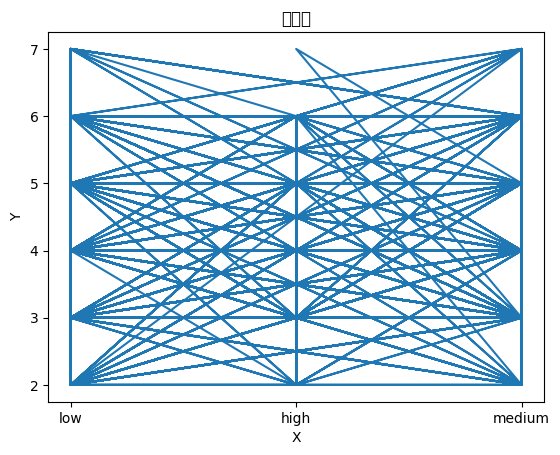

In [64]:
def graph(val):
    clear_output()
    display(dropdown1)
    pick_data = test.loc[(test['code']==val['new'])]
    x = pick_data['Product_importance']
    y = pick_data['Customer_care_calls']
    plt.plot(x, y)
    plt.xlabel('X')  # X축 레이블에 한글 폰트 적용
    plt.ylabel('Y')  # Y축 레이블에 한글 폰트 적용
    plt.title('그래프')  # 그래프 제목에 한글 폰트 적용
    plt.show()
    
list = test1['code'].tolist()

dropdown1 = Dropdown(options=list, description='지역 선택:')
dropdown1.observe(graph,names='value')
display(dropdown1)

In [65]:
test.iloc[:,4]


0        2
1        5
2        2
3        3
4        2
        ..
10994    1
10995    1
10996    4
10997    2
10998    5
Name: Customer_rating, Length: 10999, dtype: int64